# Tensorflow - Basics

In [201]:
import tensorflow as tf

print(tf.__version__)
print(tf.test.is_gpu_available())

1.12.3
True


## Graphs and Sessions
TensorFlow uses a dataflow graph to represent your computation in terms of the dependencies between individual operations. This leads to a low-level programming model in which you first define the dataflow graph, then create a TensorFlow session to run parts of the graph across a set of local and remote devices.

In [202]:
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4]))
print(tf.square(5))
print(tf.reduce_sum([1, 2, 3]))

Tensor("Add_70:0", shape=(), dtype=int32)
Tensor("Add_71:0", shape=(2,), dtype=int32)
Tensor("Square_6:0", shape=(), dtype=int32)
Tensor("Sum_36:0", shape=(), dtype=int32)


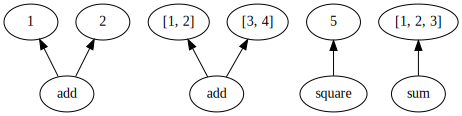

In [203]:
try:
    from graphviz import Digraph
    dot = Digraph(format='png')
    dot.attr(rankdir='BT')
    dot.body.append("""
    add_1 [label="add"]; add_1 -> 1; add_1 -> 2
    add_2 [label="add"]; add_2 -> "[1, 2]"; add_2 -> "[3, 4]"
    "square" -> 5
    "sum" -> "[1, 2, 3]"
    """)
except:
    dot = None
dot

In [204]:
with tf.Session() as sess:
    print(sess.run(tf.add(1, 2)))
    print(sess.run(tf.add([1, 2], [3, 4])))
    print(sess.run(tf.square(5)))
    print(sess.run(tf.reduce_sum([1, 2, 3])))

3
[4 6]
25
6


## Variable
A variable maintains state in the graph across calls to run(). You add a variable to the graph by constructing an instance of the class Variable.

In [205]:
a = tf.Variable(1.0, name="a")
b = tf.Variable(2.0, name="b")
c = a + b
print(a, b, c)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    # Initializing the Variables
    sess.run(init)
    print('c =', sess.run(c))
    
    sess.run(a.assign(10.0))
    sess.run(b.assign(20.0))
    print('c =', sess.run(c))

<tf.Variable 'a_32:0' shape=() dtype=float32_ref> <tf.Variable 'b_66:0' shape=() dtype=float32_ref> Tensor("add_74:0", shape=(), dtype=float32)
c = 3.0
c = 30.0


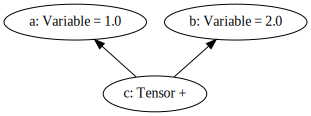

In [206]:
try:
    from graphviz import Digraph
    dot = Digraph(format='png')
    dot.attr(rankdir='BT')
    dot.node('a', 'a: Variable = 1.0')
    dot.node('b', 'b: Variable = 2.0')
    dot.node('c', 'c: Tensor +')
    dot.edges(['ca', 'cb'])
except:
    dot = None
dot

## Placeholder
A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data.

In [207]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
z = x + y
print(x, y, z)

with tf.Session() as sess:
    print('z =', sess.run(z, feed_dict={x: 1.0, y: 2.0}))
    print('z =', sess.run(z, feed_dict={x: 10.0, y: 20.0}))

Tensor("Placeholder_102:0", dtype=float32) Tensor("Placeholder_103:0", dtype=float32) Tensor("add_75:0", dtype=float32)
z = 3.0
z = 30.0


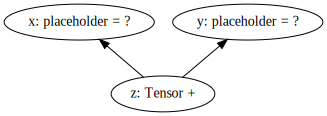

In [208]:
try:
    from graphviz import Digraph
    dot = Digraph(format='png')
    dot.attr(rankdir='BT')
    dot.node('x', 'x: placeholder = ?')
    dot.node('y', 'y: placeholder = ?')
    dot.node('z', 'z: Tensor +')
    dot.edges(['zx', 'zy'])
except:
    dot = None
dot

## Example: Linear Function with Variables and Placeholders

- Target function: $Y = W \cdot X + b$

In [209]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(1.0, name="W")
b = tf.Variable(0.0, name="b")

y_pred = W * X + b
cost = tf.reduce_sum(tf.pow(y_pred - Y, 2)) / 2

init = tf.global_variables_initializer()

data = [10, 20]

In [209]:
with tf.Session() as sess:
    sess.run(init)
    
    print('W =', sess.run(W), ', b = ', sess.run(b))
    print('y_pred =', sess.run(y_pred, feed_dict = {X: 10.0}))
    print('cost =', sess.run(cost, feed_dict = {X: 10.0, Y: 20.0}))

    sess.run(W.assign(0.3))
    sess.run(b.assign(10.0))
    
    print('W =', sess.run(W), ', b = ', sess.run(b))
    print('y_pred =', sess.run(y_pred, feed_dict = {X: 10.0}))
    print('cost =', sess.run(cost, feed_dict = {X: 10.0, Y: 20.0}))

    sess.run([W.assign(0.5), b.assign(15.0)])
    
    print(sess.run([W, b, y_pred, cost], feed_dict = {X: 10.0, Y: 20.0}))

W = 1.0 , b =  0.0
y_pred = 10.0
cost = 50.0
W = 0.3 , b =  10.0
y_pred = 13.0
cost = 24.5
[0.5, 15.0, 20.0, 0.0]


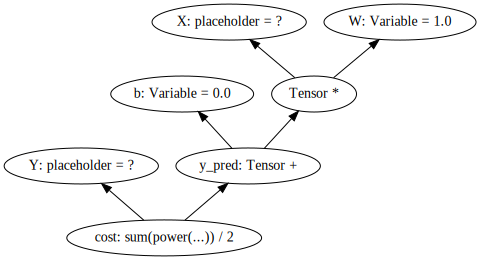

In [210]:
try:
    from graphviz import Digraph
    dot = Digraph(format='png')
    dot.attr(rankdir='BT')
    dot.node('X', 'X: placeholder = ?')
    dot.node('Y', 'Y: placeholder = ?')
    dot.node('W', 'W: Variable = 1.0')
    dot.node('b', 'b: Variable = 0.0')
    dot.node('*', 'Tensor *')
    dot.node('+', 'y_pred: Tensor +')
    dot.node('c', 'cost: sum(power(...)) / 2')
    dot.edges(['*X', '*W', '+*', '+b', 'c+', 'cY'])
    
except:
    dot = None
dot

## Example: Linear Regression Problem

In [211]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [219]:
# Genrating random linear data
# There will be 50 data points ranging from 0 to 50
x = np.linspace(0, 50, 50)
y = np.linspace(20, 50, 50)

# Adding noise to the random linear data
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)
n = len(x) # Number of data points
print(n)

50


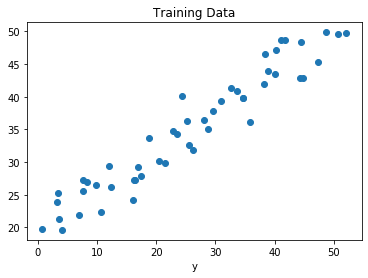

In [220]:
# Plot of Training Data
plt.scatter(x, y)
plt.xlabel('x')
plt.xlabel('y')
plt.title("Training Data")
plt.show()

In [221]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(np.random.randn(), name="W")
b = tf.Variable(np.random.randn(), name="b")

learning_rate = 0.01
training_epochs = 500

# Hypothesis
y_pred = X * W + b

# Mean Squared Error Cost Function
cost = tf.reduce_sum(tf.pow(y_pred - Y, 2)) / (2 * n)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()

In [222]:
# Starting the Tensorflow Session
with tf.Session() as sess:

    # Initializing the Variables
    sess.run(init)

    # Iterating through all the epochs
    for epoch in range(training_epochs):

        # Feeding each data point into the optimizer using Feed Dictionary
        for (_x, _y) in zip(x, y):
            sess.run(optimizer, feed_dict = {X : _x, Y : _y})

        # Displaying the result after every 50 epochs
        if (epoch + 1) % 50 == 0:
            # Calculating the cost a every epoch
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))

    # Storing necessary values to be used outside the Session
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 60.0092 W = 0.9585309 b = 1.1603453
Epoch 100 : cost = 49.52754 W = 0.9222493 b = 2.9810061
Epoch 150 : cost = 40.96894 W = 0.8894373 b = 4.627561
Epoch 200 : cost = 33.98182 W = 0.85976315 b = 6.1166596
Epoch 250 : cost = 28.278818 W = 0.8329266 b = 7.463354
Epoch 300 : cost = 23.624956 W = 0.80865663 b = 8.681258
Epoch 350 : cost = 19.828224 W = 0.786708 b = 9.782671
Epoch 400 : cost = 16.731483 W = 0.7668581 b = 10.77877
Epoch 450 : cost = 14.206509 W = 0.7489065 b = 11.6796055
Epoch 500 : cost = 12.148377 W = 0.7326715 b = 12.494303


Training cost = 12.148377 Weight = 0.7326715 bias = 12.494303


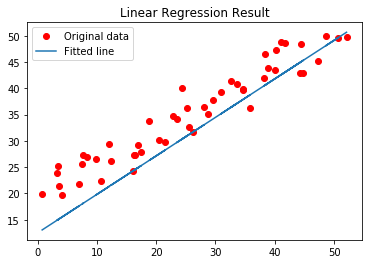

In [223]:
# Calculating the predictions
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias)
# Plotting the Results
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

## Example: XOR Problem

Linear regression problem is [linear separable](https://en.wikipedia.org/wiki/Linear_separability), but xor problem is not.

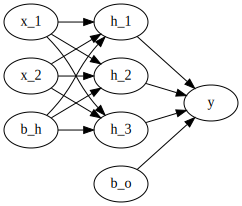

In [1]:
try:
    from graphviz import Digraph
    dot = Digraph(format='png')
    dot.attr(rankdir='LR')
    dot.body.append("""
    "x_1" -> "h_1"; "x_1" -> "h_2"; "x_1" -> "h_3"
    "x_2" -> "h_1"; "x_2" -> "h_2"; "x_2" -> "h_3"
    "b_h" -> "h_1"; "b_h" -> "h_2"; "b_h" -> "h_3"
    "h_1" -> "y"; "h_2" -> "y"; "h_3" -> "y"
    "b_o" -> "y"
    """)
except:
    dot = None
dot

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time

/mnt/2ce1d30e-9805-44ab-9067-196fda7f55c5/venv/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/mnt/2ce1d30e-9805-44ab-9067-196fda7f55c5/venv/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/mnt/2ce1d30e-9805-44ab-9067-196fda7f55c5/venv/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)]

In [2]:
hidden_size = 4

# Define input and output placeholders.
X = tf.placeholder(tf.float32, shape=[1, 2], name = 'X')
Y = tf.placeholder(tf.float32, shape=[1, 1], name = 'Y')

# Define weight and bias variables.
W_h = tf.Variable(tf.truncated_normal([2, hidden_size]), name = "W_h")
W_o = tf.Variable(tf.truncated_normal([hidden_size, 1]), name = "W_o")
b_h = tf.Variable(tf.zeros([1, hidden_size]), name = "b_h")
b_o = tf.Variable(tf.zeros([1, 1]), name = "b_o")

In [3]:
N = 4

# Set training data.
INPUT_XOR = [[0,0], [0,1], [1,0], [1,1]]
OUTPUT_XOR = [[0], [1], [1], [0]]

# Define hidden and output layer.
with tf.name_scope("hidden_layer") as scope:
    H = tf.nn.relu(tf.add(tf.matmul(X, W_h), b_h))
with tf.name_scope("output") as scope:
    Y_estimated = tf.sigmoid(tf.add(tf.matmul(H, W_o), b_o))
    
# Define loss function.
with tf.name_scope("loss") as scope:
    loss = tf.reduce_mean(tf.squared_difference(Y_estimated, Y))
    
# Select optimizer.
with tf.name_scope("train") as scope:
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# Begin session.
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
losses = []

In [4]:
start_time = time.time()

# Start training.
for epoch in range(10001):
    for i in range(N):
        sess.run(train_step, feed_dict={X: INPUT_XOR[i:i+1], Y: OUTPUT_XOR[i:i+1]})

    if epoch % 1000 == 0:
        loss_value = 0
        for i in range(N):
            loss_value += sess.run(loss, feed_dict={X: INPUT_XOR[i:i+1], Y: OUTPUT_XOR[i:i+1]})

        loss_value /= N
        losses.append(loss_value)
        print('Epoch:', epoch, 'loss:', loss_value)

print('Elapsed time =', time.time() - start_time)

Epoch: 0 loss: 0.2615837436169386
Epoch: 1000 loss: 0.16776131093502045
Epoch: 2000 loss: 0.04272265289910138
Epoch: 3000 loss: 0.014403684996068478
Epoch: 4000 loss: 0.00797111343126744
Epoch: 5000 loss: 0.005315481452271342
Epoch: 6000 loss: 0.0039191716350615025
Epoch: 7000 loss: 0.0030728920246474445
Epoch: 8000 loss: 0.0025113433657679707
Epoch: 9000 loss: 0.0021146384096937254
Epoch: 10000 loss: 0.001820470206439495
Elapsed time = 40.04807424545288


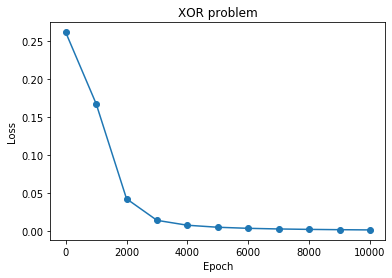

In [5]:
x = np.array(range(len(losses))) * 1000
plt.plot(x, losses, 'o-')
plt.title('XOR problem')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

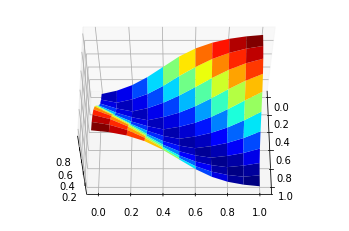

In [6]:
X1, X2 = np.meshgrid(np.linspace(0.0, 1.0, 11), np.linspace(0.0, 1.0, 11))
test_X = np.array([X1, X2]).T.reshape(-1, 2)
test_Y = np.zeros(shape=(121,1))

for i in range(121):
    test_Y[i] = sess.run(Y_estimated, feed_dict={X: test_X[i:i+1]})

test_Y = test_Y.reshape(11, 11)

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, test_Y, cmap='jet')
ax.view_init(60, 0)
plt.show()

In [211]:
sess.close()

## Reference
- https://www.tensorflow.org/learn
- https://www.tensorflow.org/tutorials
- https://www.tensorflow.org/guide/graphs
- https://www.geeksforgeeks.org/linear-regression-using-tensorflow/